In [75]:
import pandas as pd

In [76]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [77]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [78]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [79]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [80]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [82]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [83]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [84]:
assigned_group=tf.feature_column.categorical_column_with_hash_bucket("Group",hash_bucket_size=10)

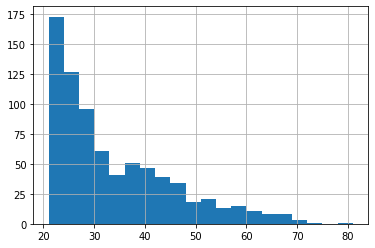

In [85]:
diabetes["Age"].hist(bins=20)

In [86]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [87]:
from sklearn.model_selection import train_test_split
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age]

In [88]:
x_data=diabetes.drop("Class",axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [89]:
labels=diabetes["Class"]
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.33,random_state=101)

In [91]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [92]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sara\\AppData\\Local\\Temp\\tmpjtzdug7d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000081978C11D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [93]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sara\AppData\Local\Temp\tmpjtzdug7d\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 72.0314
INFO:tensorflow:loss = 5.3819246, step = 101 (1.405 sec)
INFO:tensorflow:global_step/sec: 136.329
INFO:tensorflow:loss = 6.562456, step = 201 (0.737 sec)
INFO:tensorflow:global_step/sec: 130.919
INFO:tensorflow:loss = 5.539135, step = 301 (0.767 sec)
INFO:tensorflow:global_step/sec: 128.941
INFO:tensorflow:loss = 6.0281844, step = 401 (0.768 sec)
INFO:tensorflow:global_step/sec: 120.687
INFO:tensorflow:loss = 5.1346655, step = 501 (0.844 sec)
INFO:tensorflow:global_step/sec: 115.927
INFO:tensorflow:loss = 4.846106, step = 601 (0.844 sec)
INFO:tensorflow:global_step/sec: 

In [94]:
#Evaluation of Function
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-20-19:29:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpjtzdug7d\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-20-19:29:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.70472443, accuracy_baseline = 0.65748036, auc = 0.76395476, auc_precision_recall = 0.5873833, average_loss = 0.5830398, global_step = 1000, label/mean = 0.34251967, loss = 5.695851, precision = 0.5810811, prediction/mean = 0.42410654, recall = 0.49425286
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Sara\AppData\Local\Temp\tmpjtzdug7d\model.ckpt-1000


In [95]:
results

{'accuracy': 0.70472443,
 'accuracy_baseline': 0.65748036,
 'auc': 0.76395476,
 'auc_precision_recall': 0.5873833,
 'average_loss': 0.5830398,
 'label/mean': 0.34251967,
 'loss': 5.695851,
 'precision': 0.5810811,
 'prediction/mean': 0.42410654,
 'recall': 0.49425286,
 'global_step': 1000}

In [96]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
predictions=model.predict(pred_input_func)

In [97]:
my_pred=list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpjtzdug7d\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.35412312], dtype=float32),
  'logistic': array([0.41238293], dtype=float32),
  'probabilities': array([0.5876171 , 0.41238296], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.11289454], dtype=float32),
  'logistic': array([0.5281937], dtype=float32),
  'probabilities': array([0.47180632, 0.5281937 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.30162334], dtype=float32),
  'logistic': array([0.4251607], dtype=float32),
  'probabilities': array([0.5748393 , 0.42516068], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5978569], dtype=float32),
  'logistic': array([0.35483417], dtype=float32),
  'probabilities': array([0.64516586, 0.35483417], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logit

In [98]:
#Dense Neural Network
embedded_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)
feat_cols=feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age]

In [99]:
input_func=tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [100]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sara\\AppData\\Local\\Temp\\tmpd_bc15db', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000819AFD5E80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [101]:
dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sara\AppData\Local\Temp\tmpd_bc15db\model.ckpt.
INFO:tensorflow:loss = 7.8286624, step = 1
INFO:tensorflow:global_step/sec: 91.2816
INFO:tensorflow:loss = 9.441984, step = 101 (1.116 sec)
INFO:tensorflow:global_step/sec: 137.726
INFO:tensorflow:loss = 5.5932264, step = 201 (0.725 sec)
INFO:tensorflow:global_step/sec: 144.303
INFO:tensorflow:loss = 6.825127, step = 301 (0.688 sec)
INFO:tensorflow:global_step/sec: 140.435
INFO:tensorflow:loss = 7.1182933, step = 401 (0.702 sec)
INFO:tensorflow:global_step/sec: 146.785
INFO:tensorflow:loss = 5.478515, step = 501 (0.688 sec)
INFO:tensorflow:global_step/sec: 133.025
INFO:tensorflow:loss = 5.3073378, step = 601 (0.745 sec)
INFO:tensorflow:global_step/sec:

In [102]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [103]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-20-19:30:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpd_bc15db\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-20-19:30:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6535433, accuracy_baseline = 0.65748036, auc = 0.76226854, auc_precision_recall = 0.5384526, average_loss = 0.5832608, global_step = 1000, label/mean = 0.34251967, loss = 5.698009, precision = 0.44444445, prediction/mean = 0.29221225, recall = 0.04597701
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Sara\AppData\Local\Temp\tmpd_bc15db\model.ckpt-1000


{'accuracy': 0.6535433,
 'accuracy_baseline': 0.65748036,
 'auc': 0.76226854,
 'auc_precision_recall': 0.5384526,
 'average_loss': 0.5832608,
 'label/mean': 0.34251967,
 'loss': 5.698009,
 'precision': 0.44444445,
 'prediction/mean': 0.29221225,
 'recall': 0.04597701,
 'global_step': 1000}